In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn import svm

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

# SVM

In [24]:
#reading the data
df= pd.read_csv("pre_online_shoppers_intention.csv")
final_cols=[ 

 'OperatingSystems_dummies_1',
 'OperatingSystems_dummies_2',
 'OperatingSystems_dummies_3',
 'OperatingSystems_dummies_4',
 'OperatingSystems_dummies_5',
 'OperatingSystems_dummies_6',
 'OperatingSystems_dummies_7',
 'OperatingSystems_dummies_8',
 'Browser_dummies_1',
 'Browser_dummies_2',
 'Browser_dummies_3',
 'Browser_dummies_4',
 'Browser_dummies_5',
 'Browser_dummies_6',
 'Browser_dummies_7',
 'Browser_dummies_8',
 'Browser_dummies_9',
 'Browser_dummies_10',
 'Browser_dummies_11',
 'Browser_dummies_12',
 'Browser_dummies_13',
 'Region_dummies_1',
 'Region_dummies_2',
 'Region_dummies_3',
 'Region_dummies_4',
 'Region_dummies_5',
 'Region_dummies_6',
 'Region_dummies_7',
 'Region_dummies_8',
 'Region_dummies_9',
 'TrafficType_dummies_1',
 'TrafficType_dummies_2',
 'TrafficType_dummies_3',
 'TrafficType_dummies_4',
 'TrafficType_dummies_5',
 'TrafficType_dummies_6',
 'TrafficType_dummies_7',
 'TrafficType_dummies_8',
 'TrafficType_dummies_9',
 'TrafficType_dummies_10',
 'TrafficType_dummies_11',
 'TrafficType_dummies_12',
 'TrafficType_dummies_13',
 'TrafficType_dummies_14',
 'TrafficType_dummies_15',
 'TrafficType_dummies_16',
 'TrafficType_dummies_17',
 'TrafficType_dummies_18',
 'TrafficType_dummies_19',
 'TrafficType_dummies_20',
 'VisitorType_dummies_New_Visitor',
 'VisitorType_dummies_Other',
 'VisitorType_dummies_Returning_Visitor',
 'Weekend_binary',
    
 
 

 'PageValues_skew_s' ,
'season_dummies_Fall',
 'season_dummies_Spring',
 'season_dummies_summer',
 'season_dummies_winter' , 
    
'average_informational_duration_skew_s', 
'average_administrative_duration_skew_s',
'average_ProductRelated_duration_skew_s',
'average_BounceRates/ExitRates_skew_s']
y_cols = ['Revenue_Y']


df_X = df[final_cols]
df_y = df[y_cols]

In [25]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
from sklearn.naive_bayes import BernoulliNB

X_SpF = df_X.copy()#.values

y_SpF = df_y#.values.ravel() # target


#Splitting data test&train 
X_train_SpF, X_test_SpF, y_train_SpF, y_test_SpF= train_test_split(X_SpF, y_SpF, test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train_SpF,y_train_SpF)


X =  X_train_bal    #Feature Matrix
y = y_train_bal.values.ravel()         #Target Variable

# make sure the results are repeatable
np.random.seed(8)


x =X.values#.ravel()


# specify a wrapper to use
#wrapper =  LogisticRegression(solver = 'newton-cg',max_iter = 2000  ,class_weight={0:0.2,1:0.8},random_state=123 )
wrapper =  DecisionTreeClassifier(max_depth=3,random_state=123 )
#wrapper = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)
#wrapper = BernoulliNB()
#wrapper = RandomForestClassifier()
#wrapper  =RandomForestClassifier(random_state=123,n_estimators=700,min_samples_split=60,class_weight={0:0.20,1:0.80})

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, f1_weighted ,etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=6 )#,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number of 

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.887
Indices of selected features:  [62 54 35 47 20 60]
Importance of selected features:  [0.686 0.671 0.604 0.587 0.586 0.573]
Total iterations for the optimal feature set: 25


array(['average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s',
       'TrafficType_dummies_6', 'TrafficType_dummies_18',
       'Browser_dummies_13', 'average_administrative_duration_skew_s'],
      dtype=object)

In [ ]:



SVM_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xgbm_model = gbm_model_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
XSVM = SVM_Xdata.values

#getting the values of our y:
y_SVM = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XSVM, y_SVM , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates)

# Train the classifier on training data
clf.fit(X_train_bal, y_train_bal)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier


SVM_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xgbm_model = gbm_model_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
XSVM = SVM_Xdata.values

#getting the values of our y:
y_SVM = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XSVM, y_SVM , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


SVM_model = svm.SVC(kernel='rbf',  random_state=123)

SVM_model.fit(X_train_bal, y_train_bal)

SVM_model_train_pred= SVM_model.predict(X_train_bal)

SVM_model_test_pred = SVM_model.predict(X_test)








In [5]:

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(SVM_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(SVM_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,SVM_model_test_pred))
print("Precision:",precision_score(y_test,SVM_model_test_pred))
print("Recall:",recall_score(y_test,SVM_model_test_pred))
roc_auc = roc_auc_score(y_test, SVM_model_test_pred)
print('AUC' ,roc_auc)

print('Test Classification Report')
print(classification_report(y_test,SVM_model_test_pred))

print('Train Classification Report')
print(classification_report(y_train_bal,SVM_model_train_pred))
print("score train",SVM_model.score(X_train_bal, y_train_bal))
#print("score train",SVM_model.score(X_test, y_train_bal))
print("score test",SVM_model.score(X_test, y_test))

#print("Train Metrics")


model bias (f1-score): 0.9108701974635993
model variance (f1-score): 0.006538585983059798
model bias (ROC/AUC): 0.9726486261763203
model variance (ROC/AUC): 0.0025772602125544333
Test Metrics
Accuracy: 0.8611741809925397
Precision: 0.5461200585651538
Recall: 0.7596741344195519
AUC 0.8200376844937265
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2592
           1       0.55      0.76      0.64       491

    accuracy                           0.86      3083
   macro avg       0.75      0.82      0.77      3083
weighted avg       0.89      0.86      0.87      3083



In [ ]:
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
#just for the linear kernal
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(SVM_model.coef_, SVM_Xdata.columns)

## with feature selection

In [26]:
from sklearn.ensemble import GradientBoostingClassifier


SVM_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
XSVM = SVM_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
XSVM = SVM_Xdata.values

#getting the values of our y:
y_SVM = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XSVM, y_SVM , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


SVM_model2 = SVC(kernel='rbf', random_state=123)

SVM_model2.fit(X_train_bal, y_train_bal)

SVM_model_train_pred2= SVM_model2.predict(X_train_bal)

SVM_model_test_pred2 = SVM_model2.predict(X_test)








In [27]:

from sklearn.ensemble import GradientBoostingClassifier


SVM_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
XSVM = SVM_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
XSVM = SVM_Xdata.values

#getting the values of our y:
y_SVM = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XSVM, y_SVM , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


SVM_model2 = SVC(kernel='rbf', random_state=123)

SVM_model2.fit(X_train_bal, y_train_bal)

SVM_model_train_pred2= SVM_model2.predict(X_train_bal)

SVM_model_test_pred2 = SVM_model2.predict(X_test)








rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(SVM_model2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,SVM_model_test_pred2))
print("Precision:",precision_score(y_test,SVM_model_test_pred2))
print("Recall:",recall_score(y_test,SVM_model_test_pred2))
roc_auc = roc_auc_score(y_test, SVM_model_test_pred2)
print('AUC' ,roc_auc)

print('Test Classification Report')
print(classification_report(y_test,SVM_model_test_pred2))

print('Train Classification Report')
print(classification_report(y_train_bal,SVM_model_train_pred2))
print("score train",SVM_model2.score(X_train_bal, y_train_bal))
#print("score train",SVM_model.score(X_test, y_train_bal))
print("score test",SVM_model2.score(X_test, y_test))

#print("Train Metrics")


model bias (f1-score): 0.9107517655424308
model variance (f1-score): 0.0071738598212890406
model bias (ROC/AUC): 0.9723766106156543
model variance (ROC/AUC): 0.0026024108854971117
Test Metrics
Accuracy: 0.8618228997729485
Precision: 0.5473071324599709
Recall: 0.7657841140529531
AUC 0.8228997730758593
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2592
           1       0.55      0.77      0.64       491

    accuracy                           0.86      3083
   macro avg       0.75      0.82      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Train Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7830
           1       0.90      0.94      0.92      7830

    accuracy                           0.92     15660
   macro avg       0.92      0.92      0.92     15660
weighted avg       0.92      0.92      0.92 

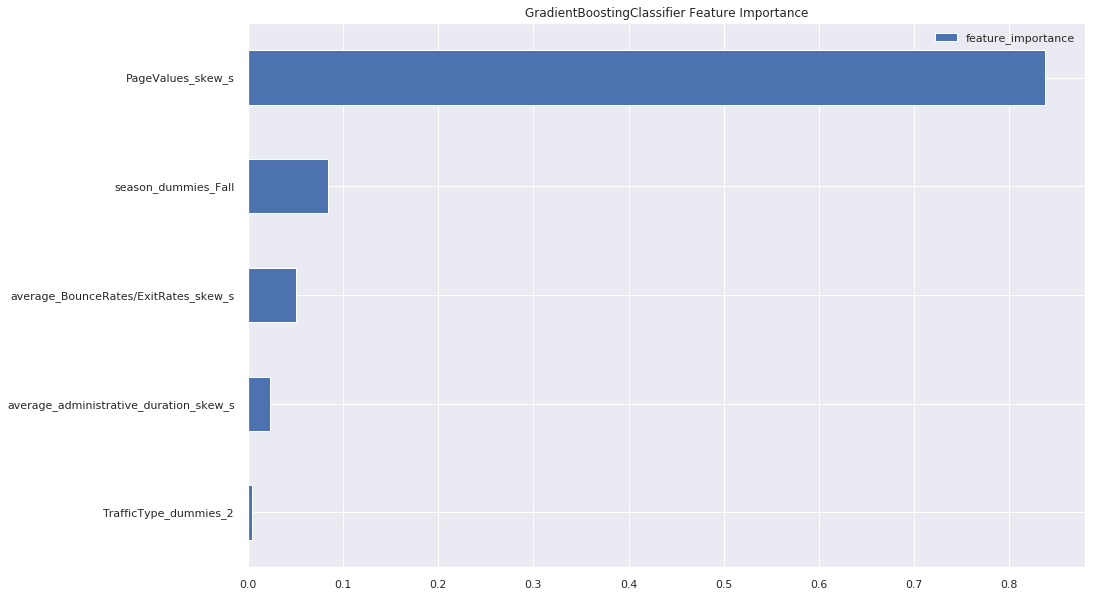

In [68]:
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
#features importances  just for the linear kernal
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()


f_importances(SVM_model.coef_, best_features_spsa)